### EDA on Movie Poster dataset

In [29]:
import os
import pandas as pd
import numpy as np
import requests
from PIL import Image 
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


In [2]:
IMAGE_PATH = './data/'

## Import Data

In [3]:
df = pd.read_csv('movies_dataset_final.csv')

In [4]:
df.shape

(28880, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'tconst', 'title', 'year', 'genre', 'director', 'actors',
       'plot', 'country', 'awards', 'poster', 'rating', 'votes', 'type'],
      dtype='object')

In [6]:
df = df.rename(columns={"Unnamed: 0": "id"})

In [7]:
df.head()

,id,tconst,title,year,genre,director,actors,plot,country,awards,poster,rating,votes,type
0,1,tt3608918,Azzurrina,2023,Horror,Giacomo Franciosa,"Tatiana Luter, Paolo Stella, Gianfranco Terrin",The tale of Guendalina was passed down verball...,Italy,0 awards and 0 nominees,https://m.media-amazon.com/images/M/MV5BOWQ5MG...,9.0,10,movie
1,2,tt15908496,Dear Jackie,2021,Documentary,Henri Pardo,"Ronald Jones, Ivan Livingstone, Majiza Philips",Dear Jackie paints a picture of the Black comm...,Canada,0 awards and 0 nominees,https://m.media-amazon.com/images/M/MV5BNDIwYz...,7.5,16,movie
2,3,tt28378602,Zena s gumenim rukavicama,2023,Drama,Mario Sulina,"Areta Curkovic, Sandra Loncaric, Miro Cabraja",The film was inspired by the great strike of e...,Croatia,0 awards and 0 nominees,https://m.media-amazon.com/images/M/MV5BODE4NG...,7.1,36,movie
3,4,tt27129223,Fast Shark II: Faster Shark,2023,"Comedy, Sci-Fi",Chloe Pelletier,"Grace Barrington, John Bradshaw, Josefa Calero",A fast shark that has grown even faster contin...,United States,0 awards and 0 nominees,https://m.media-amazon.com/images/M/MV5BYWY0NT...,7.7,79,movie
4,5,tt15173938,Shooting Guard,2022,Thriller,Luke Ostermiller,"Agapi Petra, Myles Juniel, Exzinia Scott",In an effort to save his mom from being evicte...,United States,0 awards and 0 nominees,https://m.media-amazon.com/images/M/MV5BN2FjZD...,8.2,7,movie


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28880 entries, 0 to 28879
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        28880 non-null  int64  
 1   tconst    28880 non-null  object 
 2   title     28879 non-null  object 
 3   year      28880 non-null  object 
 4   genre     28880 non-null  object 
 5   director  28620 non-null  object 
 6   actors    28880 non-null  object 
 7   plot      28601 non-null  object 
 8   country   28880 non-null  object 
 9   awards    28880 non-null  object 
 10  poster    27938 non-null  object 
 11  rating    28880 non-null  float64
 12  votes     28880 non-null  int64  
 13  type      28880 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 3.1+ MB


In [9]:
# check for mixed data types

for i in df.columns:
    print("-" * 40)
    print(f"Column Name: {i}")
    print(df[i].map(type).value_counts())

----------------------------------------
Column Name: id
id
<class 'int'>    28880
Name: count, dtype: int64
----------------------------------------
Column Name: tconst
tconst
<class 'str'>    28880
Name: count, dtype: int64
----------------------------------------
Column Name: title
title
<class 'str'>      28879
<class 'float'>        1
Name: count, dtype: int64
----------------------------------------
Column Name: year
year
<class 'str'>    28880
Name: count, dtype: int64
----------------------------------------
Column Name: genre
genre
<class 'str'>    28880
Name: count, dtype: int64
----------------------------------------
Column Name: director
director
<class 'str'>      28620
<class 'float'>      260
Name: count, dtype: int64
----------------------------------------
Column Name: actors
actors
<class 'str'>    28880
Name: count, dtype: int64
----------------------------------------
Column Name: plot
plot
<class 'str'>      28601
<class 'float'>      279
Name: count, dtype: int64

In [10]:
df.isnull().sum() 

id            0
tconst        0
title         1
year          0
genre         0
director    260
actors        0
plot        279
country       0
awards        0
poster      942
rating        0
votes         0
type          0
dtype: int64

In [11]:
# would keep the year categorical
# df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [12]:
# load images

img_set = df[["tconst", "genre", "title"]]

images = []
meta_data = []
titles = []
resolution = []

problems = []

# # for file in img_set["tconst"]:
for index, row in df.iterrows():
    
#     print(row.tconst)
    
    file_path = IMAGE_PATH + row.tconst + ".jpg"
    
    try:
        img = load_img(file_path)
        images.append(img)
        meta_data.append(row.genre)
        titles.append(row.title)
        resolution.append(img.size)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        problems.append(file_path)
    except UnidentifiedImageError:
        print(f"Cannot identify image file: {file_path}")
        problems.append(file_path)

File not found: ./data/tt15955156.jpg
File not found: ./data/tt4513996.jpg
File not found: ./data/tt5202868.jpg
File not found: ./data/tt5599876.jpg
File not found: ./data/tt1634107.jpg
File not found: ./data/tt5369250.jpg
File not found: ./data/tt5272032.jpg
File not found: ./data/tt32765621.jpg
File not found: ./data/tt21799612.jpg
File not found: ./data/tt13409584.jpg
File not found: ./data/tt5774076.jpg
File not found: ./data/tt5257458.jpg
File not found: ./data/tt4712522.jpg
File not found: ./data/tt2231210.jpg
File not found: ./data/tt33372484.jpg
File not found: ./data/tt7010380.jpg
File not found: ./data/tt21858154.jpg
File not found: ./data/tt9614972.jpg
File not found: ./data/tt16382386.jpg
File not found: ./data/tt29491755.jpg
File not found: ./data/tt10183674.jpg
Cannot identify image file: ./data/tt16748290.jpg
File not found: ./data/tt29804408.jpg
File not found: ./data/tt31947573.jpg
File not found: ./data/tt4669086.jpg
File not found: ./data/tt29415777.jpg
File not foun

File not found: ./data/tt7025412.jpg
File not found: ./data/tt5772914.jpg
File not found: ./data/tt5441290.jpg
File not found: ./data/tt26249782.jpg
File not found: ./data/tt20603328.jpg
File not found: ./data/tt9601856.jpg
File not found: ./data/tt6405058.jpg
File not found: ./data/tt14905242.jpg
File not found: ./data/tt28443048.jpg
File not found: ./data/tt10766808.jpg
File not found: ./data/tt5466342.jpg
File not found: ./data/tt3518152.jpg
File not found: ./data/tt4305756.jpg
File not found: ./data/tt14928512.jpg
File not found: ./data/tt6302650.jpg
File not found: ./data/tt16492548.jpg
File not found: ./data/tt15287766.jpg
File not found: ./data/tt3576752.jpg
File not found: ./data/tt3650720.jpg
File not found: ./data/tt3702980.jpg
File not found: ./data/tt21815036.jpg
File not found: ./data/tt5901606.jpg
File not found: ./data/tt23864668.jpg
File not found: ./data/tt32062912.jpg
File not found: ./data/tt4866704.jpg
File not found: ./data/tt33710853.jpg
File not found: ./data/tt1

Cannot identify image file: ./data/tt20494820.jpg
File not found: ./data/tt5197778.jpg
File not found: ./data/tt3757726.jpg
File not found: ./data/tt13197648.jpg
Cannot identify image file: ./data/tt18550220.jpg
File not found: ./data/tt3097934.jpg
Cannot identify image file: ./data/tt11633840.jpg
File not found: ./data/tt15740890.jpg
File not found: ./data/tt4965258.jpg
File not found: ./data/tt6247180.jpg
File not found: ./data/tt7600396.jpg
File not found: ./data/tt7852572.jpg
File not found: ./data/tt18349368.jpg
File not found: ./data/tt5142886.jpg
File not found: ./data/tt4206724.jpg
File not found: ./data/tt3572478.jpg
File not found: ./data/tt3848472.jpg
Cannot identify image file: ./data/tt16350250.jpg
File not found: ./data/tt2776800.jpg
File not found: ./data/tt4081350.jpg
File not found: ./data/tt7870694.jpg
File not found: ./data/tt10375814.jpg
File not found: ./data/tt10732154.jpg
File not found: ./data/tt5135646.jpg
File not found: ./data/tt17677434.jpg
File not found: .

Cannot identify image file: ./data/tt33070747.jpg
File not found: ./data/tt11203722.jpg
File not found: ./data/tt4462596.jpg
File not found: ./data/tt12206040.jpg
File not found: ./data/tt12345004.jpg
File not found: ./data/tt4316070.jpg
File not found: ./data/tt3622052.jpg
Cannot identify image file: ./data/tt27679443.jpg
File not found: ./data/tt7329012.jpg
File not found: ./data/tt15046120.jpg
File not found: ./data/tt15557994.jpg
File not found: ./data/tt4131102.jpg
File not found: ./data/tt13216330.jpg
File not found: ./data/tt19867922.jpg
File not found: ./data/tt26697087.jpg
File not found: ./data/tt13875862.jpg
File not found: ./data/tt3829278.jpg
File not found: ./data/tt12787746.jpg
File not found: ./data/tt9026136.jpg
File not found: ./data/tt12962196.jpg
File not found: ./data/tt12685376.jpg
File not found: ./data/tt3563066.jpg
File not found: ./data/tt13362198.jpg
File not found: ./data/tt4394310.jpg
File not found: ./data/tt3758026.jpg
File not found: ./data/tt8493028.jpg

File not found: ./data/tt15867454.jpg
File not found: ./data/tt13604060.jpg
File not found: ./data/tt21072952.jpg
File not found: ./data/tt22457410.jpg
File not found: ./data/tt14167760.jpg
File not found: ./data/tt3102146.jpg
File not found: ./data/tt22090084.jpg
Cannot identify image file: ./data/tt14779558.jpg
File not found: ./data/tt22311434.jpg
File not found: ./data/tt15238862.jpg
File not found: ./data/tt26009546.jpg
File not found: ./data/tt27413111.jpg
Cannot identify image file: ./data/tt16992590.jpg
File not found: ./data/tt27436077.jpg
File not found: ./data/tt4345230.jpg
File not found: ./data/tt5049298.jpg
File not found: ./data/tt3493378.jpg
File not found: ./data/tt22468406.jpg
File not found: ./data/tt4712976.jpg
File not found: ./data/tt27722524.jpg
File not found: ./data/tt29764421.jpg
File not found: ./data/tt15235390.jpg
File not found: ./data/tt4446250.jpg
File not found: ./data/tt13839612.jpg
File not found: ./data/tt29215800.jpg
File not found: ./data/tt2238579

File not found: ./data/tt1318527.jpg
File not found: ./data/tt10852008.jpg
Cannot identify image file: ./data/tt11569994.jpg
File not found: ./data/tt15166394.jpg
File not found: ./data/tt6398990.jpg
File not found: ./data/tt26224870.jpg
File not found: ./data/tt18245300.jpg
File not found: ./data/tt8176324.jpg
File not found: ./data/tt3670660.jpg
File not found: ./data/tt26595643.jpg
File not found: ./data/tt10541134.jpg
File not found: ./data/tt7769118.jpg
File not found: ./data/tt10231478.jpg
File not found: ./data/tt7654668.jpg
File not found: ./data/tt28289871.jpg
File not found: ./data/tt8835708.jpg
File not found: ./data/tt15787250.jpg
File not found: ./data/tt3861696.jpg
File not found: ./data/tt3776190.jpg
File not found: ./data/tt4378468.jpg
File not found: ./data/tt5496828.jpg
File not found: ./data/tt21353192.jpg
File not found: ./data/tt5730832.jpg
File not found: ./data/tt4824378.jpg
File not found: ./data/tt11603230.jpg
File not found: ./data/tt30809481.jpg
File not foun

File not found: ./data/tt3783990.jpg
File not found: ./data/tt21960166.jpg
File not found: ./data/tt14905582.jpg
File not found: ./data/tt6386600.jpg
Cannot identify image file: ./data/tt35046749.jpg
File not found: ./data/tt30624187.jpg
File not found: ./data/tt29669778.jpg
File not found: ./data/tt8130454.jpg
File not found: ./data/tt17037904.jpg
Cannot identify image file: ./data/tt15459006.jpg
File not found: ./data/tt31778949.jpg
File not found: ./data/tt21446978.jpg
File not found: ./data/tt6841322.jpg
File not found: ./data/tt3671042.jpg
File not found: ./data/tt33240622.jpg
File not found: ./data/tt16589882.jpg
File not found: ./data/tt6778158.jpg
File not found: ./data/tt26542723.jpg
File not found: ./data/tt27626885.jpg
File not found: ./data/tt8301774.jpg
File not found: ./data/tt33509307.jpg
File not found: ./data/tt32597616.jpg
File not found: ./data/tt15128090.jpg
File not found: ./data/tt12622578.jpg
File not found: ./data/tt18245210.jpg
File not found: ./data/tt21625826

File not found: ./data/tt14194204.jpg
File not found: ./data/tt23458996.jpg
File not found: ./data/tt3774658.jpg
File not found: ./data/tt5660944.jpg
File not found: ./data/tt32321835.jpg
File not found: ./data/tt3497410.jpg
File not found: ./data/tt5040904.jpg
File not found: ./data/tt6071436.jpg
File not found: ./data/tt28056959.jpg
File not found: ./data/tt29170059.jpg
File not found: ./data/tt14210206.jpg
File not found: ./data/tt4259408.jpg
File not found: ./data/tt4643666.jpg
File not found: ./data/tt10049110.jpg
File not found: ./data/tt17886916.jpg


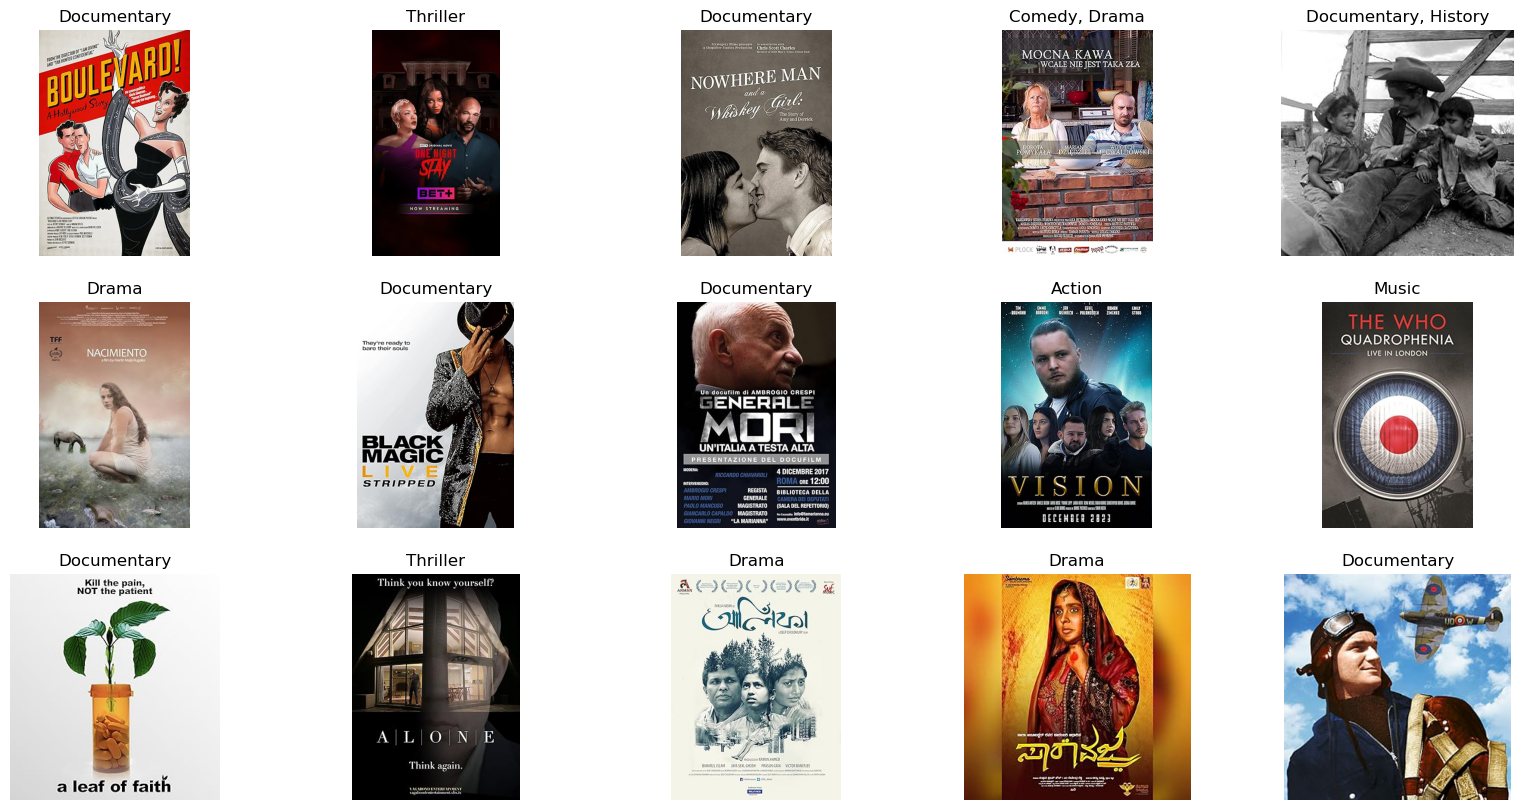

In [13]:
nrows, ncols = 3,5 # print 15 random images

samples = random.sample(range(0, len(meta_data)), 15)

fig, ax = plt.subplots(nrows, ncols, figsize=(20,10))

for i in range(nrows):
    for j in range(ncols):
        index = i*ncols + j
        ax[i,j].imshow(images[samples[index]])
        ax[i,j].axis('off')
        ax[i,j].set_title(meta_data[samples[index]])


In [14]:
len(problems)

1577

In [15]:
len(images)

27303

## Handling Missing Data

In [16]:
# # Drop rows with missing poster images

# df = df.dropna(subset=['poster'])
# print("Remaining rows:", len(df))


## EDA

In [17]:
df.type.value_counts()

type
movie      28871
series         8
episode        1
Name: count, dtype: int64

In [18]:
# Print frequency counts for the 'genre' column
df.genre.value_counts().head(20)

genre
Documentary                        7192
Drama                              5074
Comedy                             1278
Comedy, Drama                       827
Thriller                            590
Drama, Romance                      542
Documentary, Biography              526
Documentary, Music                  510
Action                              355
Horror                              339
Drama, Thriller                     323
Comedy, Drama, Romance              322
Romance                             321
Documentary, Sport                  310
Documentary, Biography, History     275
Documentary, History                269
Documentary, Biography, Music       250
Drama, Family                       221
Documentary, Drama                  212
Crime, Drama                        197
Name: count, dtype: int64

In [19]:
len(df.genre.unique())

806

In [20]:
# Split the 'genre' column into list of genres

df['genre_list'] = df['genre'].str.split(',\s*')
df.head()


,id,tconst,title,year,genre,director,actors,plot,country,awards,poster,rating,votes,type,genre_list
0,1,tt3608918,Azzurrina,2023,Horror,Giacomo Franciosa,"Tatiana Luter, Paolo Stella, Gianfranco Terrin",The tale of Guendalina was passed down verball...,Italy,0 awards and 0 nominees,https://m.media-amazon.com/images/M/MV5BOWQ5MG...,9.0,10,movie,[Horror]
1,2,tt15908496,Dear Jackie,2021,Documentary,Henri Pardo,"Ronald Jones, Ivan Livingstone, Majiza Philips",Dear Jackie paints a picture of the Black comm...,Canada,0 awards and 0 nominees,https://m.media-amazon.com/images/M/MV5BNDIwYz...,7.5,16,movie,[Documentary]
2,3,tt28378602,Zena s gumenim rukavicama,2023,Drama,Mario Sulina,"Areta Curkovic, Sandra Loncaric, Miro Cabraja",The film was inspired by the great strike of e...,Croatia,0 awards and 0 nominees,https://m.media-amazon.com/images/M/MV5BODE4NG...,7.1,36,movie,[Drama]
3,4,tt27129223,Fast Shark II: Faster Shark,2023,"Comedy, Sci-Fi",Chloe Pelletier,"Grace Barrington, John Bradshaw, Josefa Calero",A fast shark that has grown even faster contin...,United States,0 awards and 0 nominees,https://m.media-amazon.com/images/M/MV5BYWY0NT...,7.7,79,movie,"[Comedy, Sci-Fi]"
4,5,tt15173938,Shooting Guard,2022,Thriller,Luke Ostermiller,"Agapi Petra, Myles Juniel, Exzinia Scott",In an effort to save his mom from being evicte...,United States,0 awards and 0 nominees,https://m.media-amazon.com/images/M/MV5BN2FjZD...,8.2,7,movie,[Thriller]


In [21]:
# One hot encode
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

one_hot_genres = pd.DataFrame(mlb.fit_transform(df['genre_list']), columns=mlb.classes_)

df = df.join(one_hot_genres)

df.head()

,id,tconst,title,year,genre,director,actors,plot,country,awards,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1,tt3608918,Azzurrina,2023,Horror,Giacomo Franciosa,"Tatiana Luter, Paolo Stella, Gianfranco Terrin",The tale of Guendalina was passed down verball...,Italy,0 awards and 0 nominees,...,0,0,0,0,0,0,0,0,0,0
1,2,tt15908496,Dear Jackie,2021,Documentary,Henri Pardo,"Ronald Jones, Ivan Livingstone, Majiza Philips",Dear Jackie paints a picture of the Black comm...,Canada,0 awards and 0 nominees,...,0,0,0,0,0,0,0,0,0,0
2,3,tt28378602,Zena s gumenim rukavicama,2023,Drama,Mario Sulina,"Areta Curkovic, Sandra Loncaric, Miro Cabraja",The film was inspired by the great strike of e...,Croatia,0 awards and 0 nominees,...,0,0,0,0,0,0,0,0,0,0
3,4,tt27129223,Fast Shark II: Faster Shark,2023,"Comedy, Sci-Fi",Chloe Pelletier,"Grace Barrington, John Bradshaw, Josefa Calero",A fast shark that has grown even faster contin...,United States,0 awards and 0 nominees,...,0,0,0,1,0,0,0,0,0,0
4,5,tt15173938,Shooting Guard,2022,Thriller,Luke Ostermiller,"Agapi Petra, Myles Juniel, Exzinia Scott",In an effort to save his mom from being evicte...,United States,0 awards and 0 nominees,...,0,0,0,0,0,0,0,1,0,0


In [22]:
one_hot_genres.columns

Index(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [23]:
# check how many movies have more than one 
one_hot_genres

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28875,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
28876,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
28877,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
28878,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


/var/folders/4m/yp2tjgp53mqd_cn82ymt0ffh0000gn/T/ipykernel_47037/196326105.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genre_count.index, rotation=90);


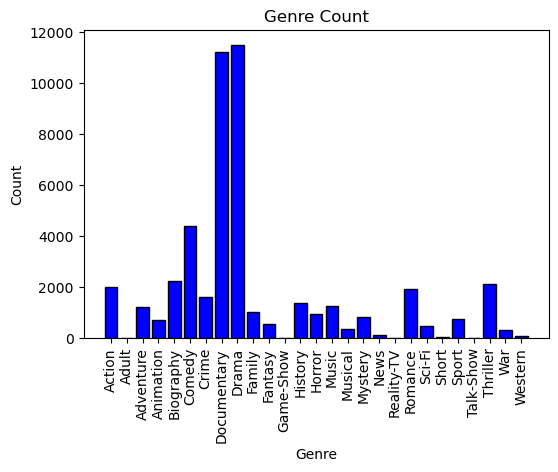

In [24]:
# genre distribution

genre_count = one_hot_genres.sum()


fig, ax = plt.subplots(figsize=(6, 4))

ax.bar(genre_count.index, genre_count.values, color='blue', edgecolor='black')
ax.set_xlabel("Genre")
ax.set_ylabel("Count")
ax.set_title("Genre Count")
ax.set_xticklabels(genre_count.index, rotation=90);


In [25]:
# count rows with more than one genre
multi_genre_images = (one_hot_genres.sum(axis=1) > 1).sum()

print(f"Number of images with more than one genre: {multi_genre_images}")

Number of images with more than one genre: 12399


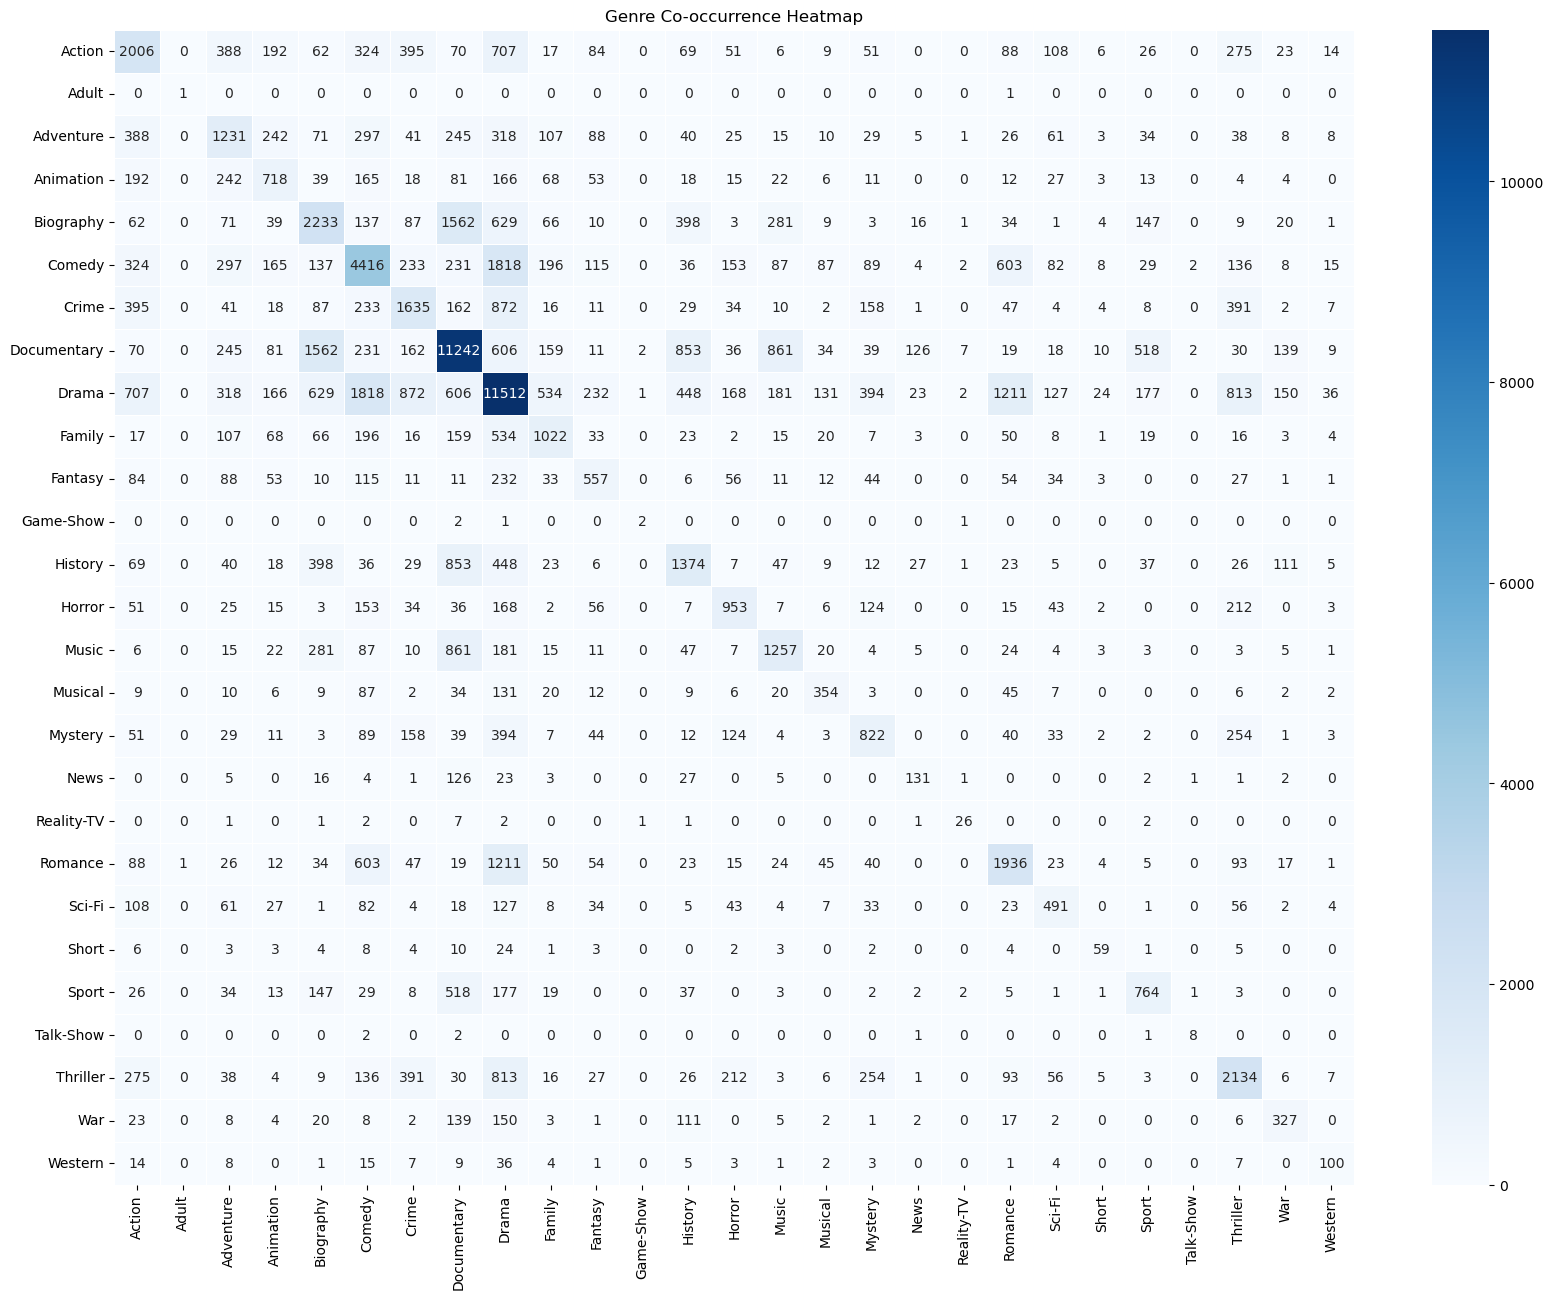

In [26]:
# create co-occurance matrix
# the diagonal values show how often a category appears individually
# the off-diagonal values show how often two categories appear together


co_occurrence = one_hot_genres.T.dot(one_hot_genres)

# create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(co_occurrence, annot=True, cmap="Blues", fmt=".0f", linewidths=0.5)

plt.title("Genre Co-occurrence Heatmap")
plt.show()

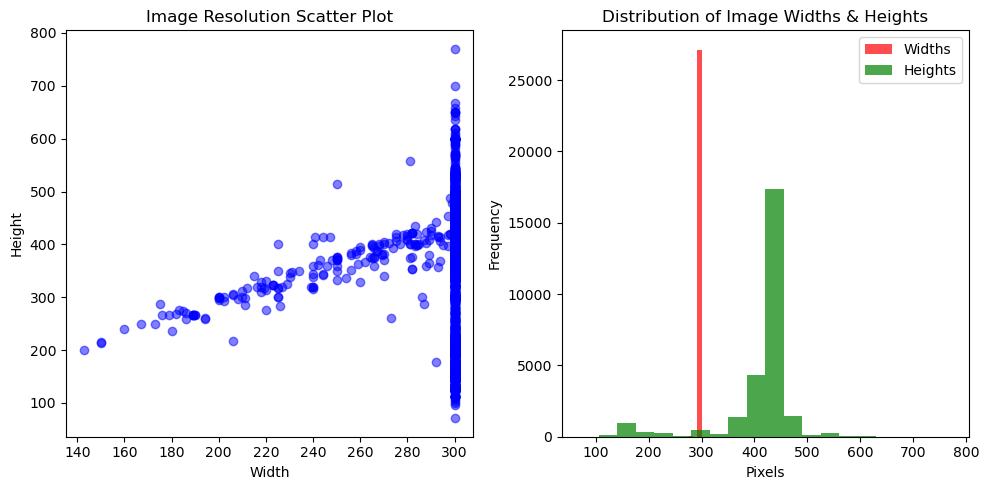

In [34]:
# investigate the resolution distribution

resolution = np.array(resolution)

widths, heights = resolution[:, 0], resolution[:, 1]

# Plot distribution of resolutions
plt.figure(figsize=(10, 5))

# scatter plot
plt.subplot(1, 2, 1)
plt.scatter(widths, heights, alpha=0.5, color="blue")
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Resolution Scatter Plot")

# histogram
plt.subplot(1, 2, 2)
plt.hist(widths, bins=20, alpha=0.7, label="Widths", color="red")
plt.hist(heights, bins=20, alpha=0.7, label="Heights", color="green")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.title("Distribution of Image Widths & Heights")
plt.legend()

plt.tight_layout()
plt.show()